In [1]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 256kB 8.4MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 1.1MB 21.5MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 3.2MB 42.4MB/s 
     |████████████████████████████████| 296kB 34.5MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=983ef6e6d668953f0488fb108af572fe39d2d5140f1309685593e3444efdaca7
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=9e1a9582a1e782e93157f84c5dddd5339d9a5bd59880d2def49e787ff772ac54
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing in

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd '/content/gdrive/MyDrive/LDS6_S7N_TranHoangBach/BaiTap/Chapter_3'

Mounted at /content/gdrive
/content/gdrive/MyDrive/LDS6_S7N_TranHoangBach/BaiTap/Chapter_3


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pandas_profiling as pp
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [4]:
df = pd.read_csv('data/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,EstimatedSalary_K,Purchased
0,15624510,Male,19,19000,19,0
1,15810944,Male,35,20000,20,0
2,15668575,Female,26,43000,43,0
3,15603246,Female,27,57000,57,0
4,15804002,Male,19,76000,76,0
...,...,...,...,...,...,...
395,15691863,Female,46,41000,41,1
396,15706071,Male,51,23000,23,1
397,15654296,Female,50,20000,20,1
398,15755018,Male,36,33000,33,0


In [5]:
profile = pp.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
col_x_used = ['Age', 'EstimatedSalary_K']
X = df[col_x_used]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(y_test.shape)
print(y.unique())
target_names = ['Not purchased', 'Purchased']
print(target_names)

(300, 2)
(100,)
[0 1]
['Not purchased', 'Purchased']


In [51]:
model = LogisticRegression()

from sklearn.metrics import accuracy_score
model.fit(X_train, y_train)
X_full = pd.concat([X_train, X_test])
y_full = pd.concat([y_train, y_test])

threshold = 0.3
pos_label = 1 # Use threshold and pos_label for Binary classification only
pos_idx = np.where(model.classes_ == pos_label)[0][0]
neg_idx = np.where(model.classes_ != pos_label)[0][0]
neg_label = model.classes_[neg_idx]
accuracy = []
y_pred_list = []
for x, y in [(X_train, y_train), (X_test, y_test), (X_full, y_full)]:
    if threshold == None:
        accuracy.append(model.score(x, y))
    else:
        y_prob = model.predict_proba(x)[:, pos_idx]
        y_pred = np.where(y_prob >= threshold, pos_label, neg_label)
        accuracy.append(accuracy_score(y, y_pred))
        y_pred_list.append(y_pred)

for acc, data in zip(accuracy, ['train', 'test', 'full']):
    print('Accuracy {}: {:,.4f}'.format(data, acc))
print('\n')
y_pred = y_pred_list[1] # Extract y_pred_test on test data

Accuracy train: 0.8167
Accuracy test: 0.8700
Accuracy full: 0.8300




               precision    recall  f1-score   support

Not purchased       0.95      0.84      0.89        63
    Purchased       0.77      0.92      0.84        37

     accuracy                           0.87       100
    macro avg       0.86      0.88      0.87       100
 weighted avg       0.88      0.87      0.87       100



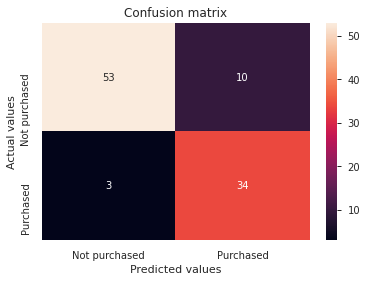

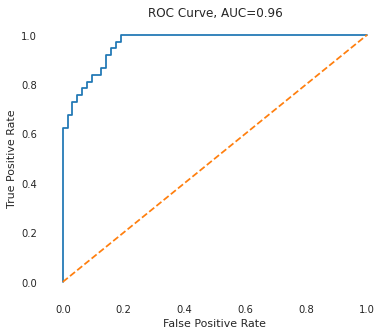

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred, target_names=target_names))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=target_names, columns=target_names)
plt.figure(figsize=(6,4))
sb.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

from sklearn.metrics import roc_curve, auc
prob = model.predict_proba(X_test)
scores = prob[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, scores)
auc_score = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], ls='--')
plt.title('ROC Curve, AUC={:.2f}'.format(auc_score))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Accuracy train: 0.8333
Accuracy test: 0.8800
Accuracy full: 0.8450


Classification report on Test set
               precision    recall  f1-score   support

Not purchased       0.86      0.97      0.91        63
    Purchased       0.93      0.73      0.82        37

     accuracy                           0.88       100
    macro avg       0.90      0.85      0.86       100
 weighted avg       0.89      0.88      0.88       100



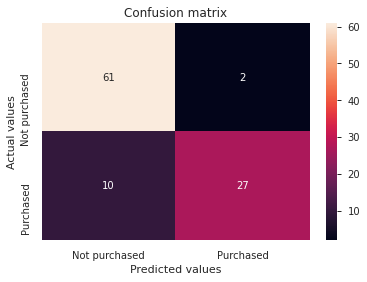

ROC curve with AUC values on Test set


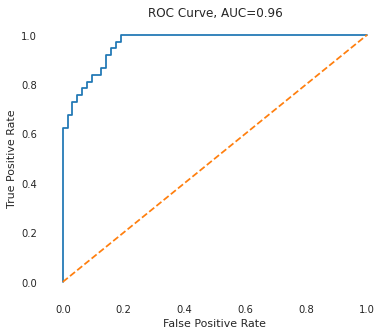

In [61]:
# Wrap to create function for other time
# Create function print result: accuracy
model = LogisticRegression()
def print_clf_result(model, X_train, y_train, X_test, y_test, threshold=None, pos_label=1):
    from sklearn.metrics import accuracy_score
    model = model.fit(X_train, y_train)
    X_full = pd.concat([X_train, X_test])
    y_full = pd.concat([y_train, y_test])

    # Use threshold and pos_label for Binary classification only
    pos_idx = np.where(model.classes_ == pos_label)[0][0]
    neg_idx = np.where(model.classes_ != pos_label)[0][0]
    neg_label = model.classes_[neg_idx]
    accuracy = []
    y_pred_list = []
    for x, y in [(X_train, y_train), (X_test, y_test), (X_full, y_full)]:
        if threshold == None:
            y_pred_list.append(model.predict(x))
            accuracy.append(model.score(x, y))
        else: # In case use threshold with Binary classification
            y_prob = model.predict_proba(x)[:, pos_idx]
            y_pred = np.where(y_prob >= threshold, pos_label, neg_label)
            accuracy.append(accuracy_score(y, y_pred))
            y_pred_list.append(y_pred)

    for acc, data in zip(accuracy, ['train', 'test', 'full']):
        print('Accuracy {}: {:,.4f}'.format(data, acc))
    print('\n')
    y_pred = y_pred_list[1] # Extract y_pred_test on test data
    return model, y_pred


# Create function plot confusion matrix, precision-recall, ROC curve
def confu_matrix_roc_auc(model_trained, X_test, y_test, y_pred, target_names):
    from sklearn.metrics import classification_report, confusion_matrix
    print('Classification report on Test set')
    print(classification_report(y_test, y_pred, target_names=target_names))
    cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=target_names, columns=target_names)
    plt.figure(figsize=(6,4))
    sb.heatmap(cm, annot=True, fmt='g')
    plt.title('Confusion matrix')
    plt.xlabel('Predicted values')
    plt.ylabel('Actual values')
    plt.show()

    from sklearn.metrics import roc_curve, auc
    print('ROC curve with AUC values on Test set')
    prob = model.predict_proba(X_test)
    scores = prob[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, scores)
    auc_score = auc(fpr, tpr)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr)
    plt.plot([0,1], [0,1], ls='--')
    plt.title('ROC Curve, AUC={:.2f}'.format(auc_score))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

# Create function draw classification line in 2-Dimemsions, color regions follow model
# pass


model_trained, y_pred = print_clf_result(model, X_train, y_train, X_test, y_test, threshold=None, pos_label=1)
confu_matrix_roc_auc(model_trained, X_test, y_test, y_pred, target_names)